## 그래프와 시각화
#### 정보의 시각화는 데이터 분석에서 무척 중요한 일이다. 
#### 어떤 경우에는 시각화가 최종 목표일때도 있다. 
#### 파이썬은 다양한 시각화 도구를 가지고 있지만, 여기서는 matplotlib와 matplotlib기반의 도구들을 위주로 살펴본다 
#### matplotlib는 주로 2D 그래프를 위한 그래픽 도구이다. Matlab과 유사한 인터페이스를 지원한다.
#### seaborn은 matplotlib 기반의 그래픽 라이브러리이다.

In [30]:
%matplotlib notebook
# show 명령 없이도 바로 그래프 표현 (정적)
import matplotlib.pyplot as plt
import numpy as np

In [26]:
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

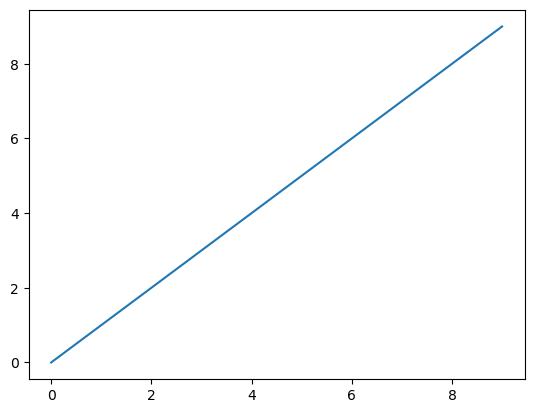

In [27]:
plt.plot(data)
plt.show()

### Figure와 Subplots
#### matplotlib에서 그래프는 Figure객채 내에서 존재한다. 그래프를 위한 새로운 figure는 plt.figure를 사용해서 생성할 수 있다.
#### add_subplot을 사용해서 subplot을 생성할 수있다. 

<IPython.core.display.Javascript object>


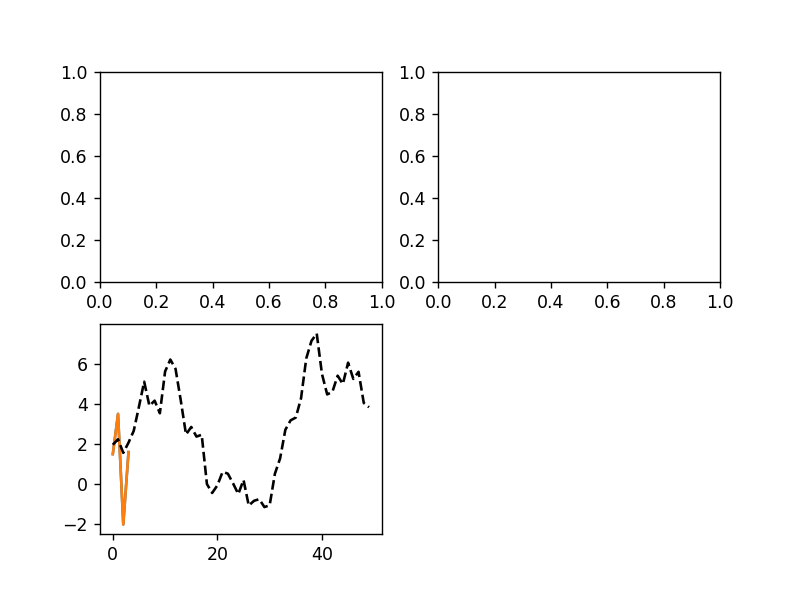

In [32]:
fig = plt.figure()
ax1 = fig.add_subplot(221)
ax1 = fig.add_subplot(222)
ax1 = fig.add_subplot(223)

In [36]:
# 가장 최근의 figure와 그 서브플롯을 그린다.
%matplotlib notebook 
plt.plot([1.5, 3.5, -2, 1.6])

In [37]:
plt.plot(np.random.randn(50).cumsum(), 'k--')

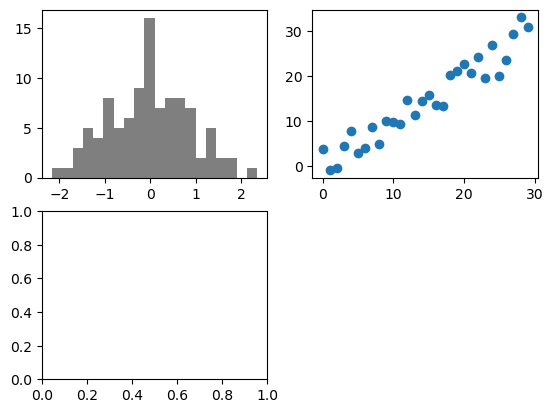

In [40]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.5)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))
plt.show()

array([[<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

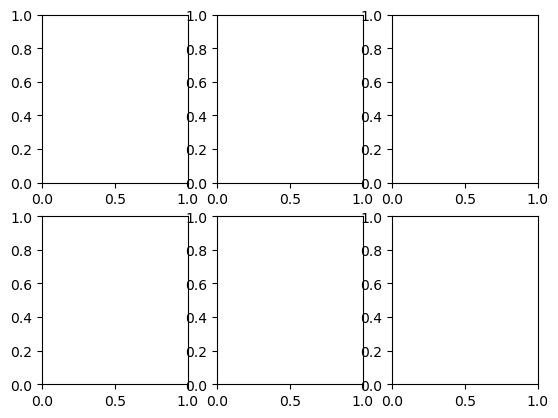

In [41]:
fig,axes = plt.subplots(2,3)
axes

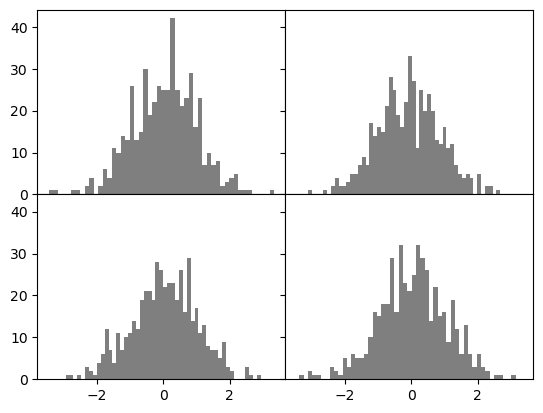

In [44]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
#sharex, sharey : 모든 subplot들이 같은 x, y축 눈금을 사용한다.
for i in range(2):
    for j in range(2):
        axes[i,j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
        
plt.subplots_adjust(wspace=0, hspace=0) #간격을 주지 않음

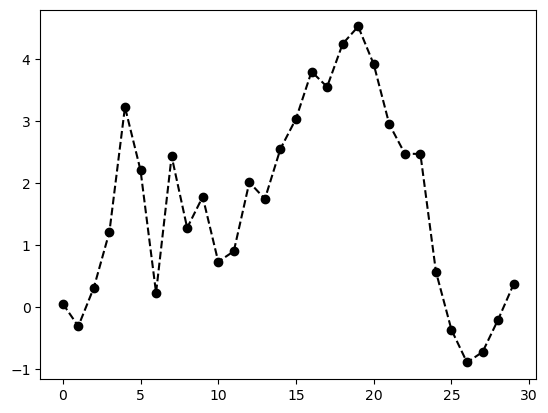

In [46]:
plt.plot(np.random.randn(30).cumsum(), 'ko--') #k : black, o, --

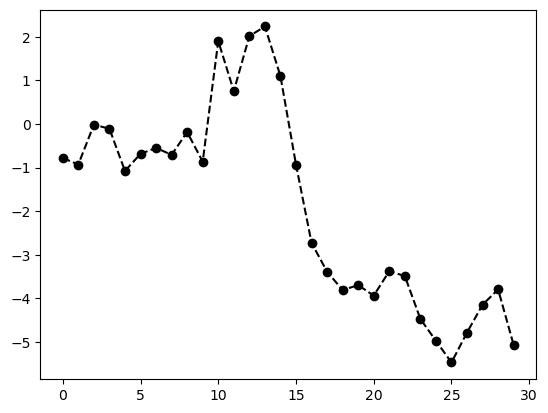

In [48]:
plt.plot(np.random.randn(30).cumsum(), color='k', linestyle='dashed', marker='o') 
# 좀 더 명시적으로 표현 가능, 알아보기 쉽다.

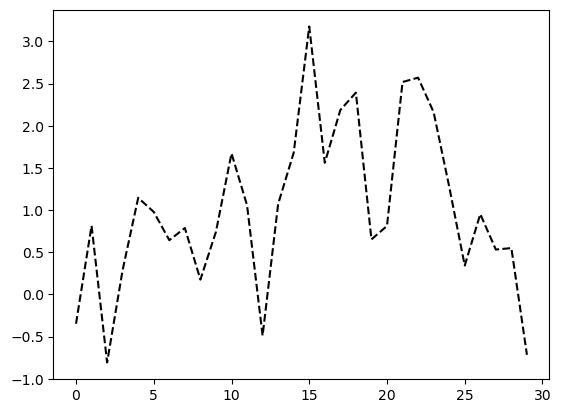

In [49]:
data = np.random.randn(30).cumsum()

plt.plot(data, 'k--', label='Default')

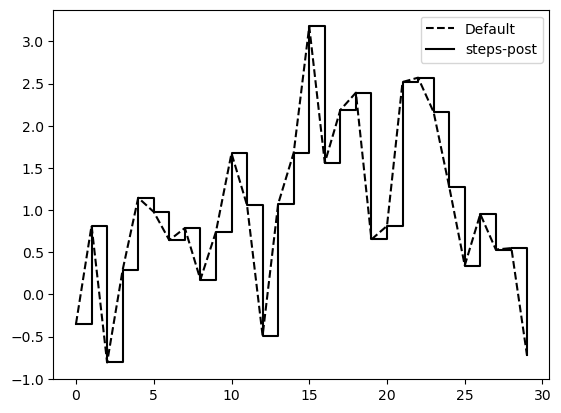

In [52]:
plt.plot(data,'k--', label='Default')
plt.plot(data,'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

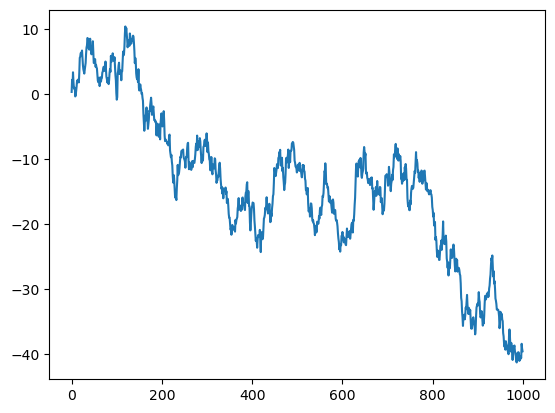

In [53]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.random.randn(1000).cumsum())

Text(0, 0.5, 'Value')

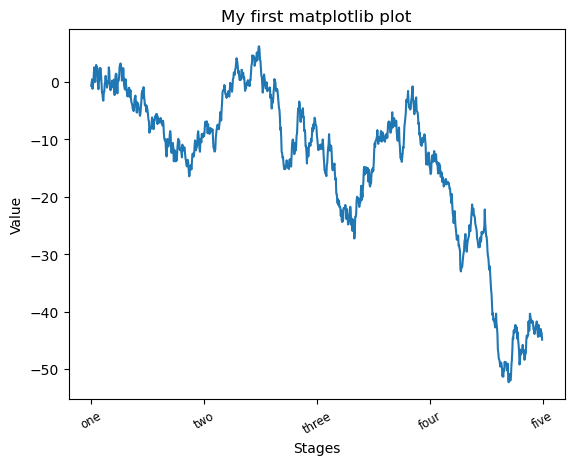

In [54]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum())

ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                           rotation=30, fontsize='small')
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')
ax.set_ylabel('Value')

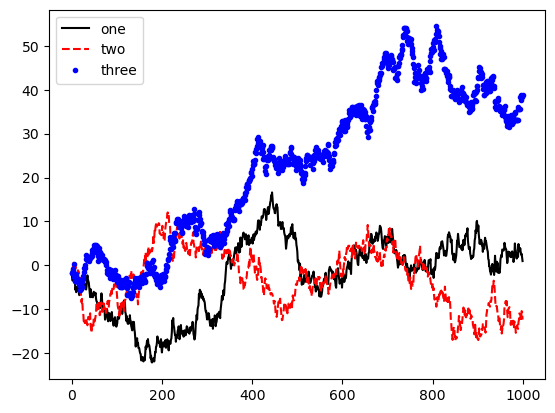

In [58]:
from numpy.random import randn

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'r--', label='two')
ax.plot(randn(1000).cumsum(), 'b.', label='three')
ax.legend(loc='best')

In [63]:
from datetime import datetime
import pandas as pd

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

#('spx.csv')에서 데이터를 읽어들입니다.
data = pd.read_csv('수업자료/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX'] #'SPX' 열을 선택하여 S&P 500 지수 데이터를 가져옵니다.

spx.plot(ax=ax, style='k-') 
#S&P 500 지수를 그래프로 그립니다. 여기서 'k-'는 검정색 실선을 의미합니다

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear stearns fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]
#금융 위기의 주요 사건들을 나타냅니다.


for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 70 ),
               xytext = (date, spx.asof(date) + 225),
               arrowprops=dict(facecolor='black', headwidth=4, width=2, headlength=4),
               horizontalalignment='left', verticalalignment='top')
# 반복문을 사용하여 각 중요한 날짜에 대해 annotate를 추가합니다. 
# annotate는 특정 지점에 화살표와 함께 텍스트를 추가하는데 사용됩니다.    

# Zoom in on 2007 - 2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')

ConversionError: Failed to convert value(s) to axis units: array([Timestamp('1990-02-01 00:00:00'), Timestamp('1990-02-02 00:00:00'),
       Timestamp('1990-02-05 00:00:00'), ...,
       Timestamp('2011-10-12 00:00:00'), Timestamp('2011-10-13 00:00:00'),
       Timestamp('2011-10-14 00:00:00')], dtype=object)

Error in callback <function _draw_all_if_interactive at 0x0000020B5B9C8F70> (for post_execute):


ConversionError: Failed to convert value(s) to axis units: datetime.datetime(2007, 10, 11, 0, 0)

ConversionError: Failed to convert value(s) to axis units: datetime.datetime(2007, 10, 11, 0, 0)

<Figure size 640x480 with 1 Axes>

## pandas에서 seaborn으로 그래프 그리기
#### matplotlib은 저수준의 라이브러리이다. 즉, 데이터를 어떻게 보여줄것인지 정하는 모든 기본 컴포넌트(그래프 종류, 눈금, 라벨, 주석 등)로 그래프를 작성해야 한다. 

<Axes: >

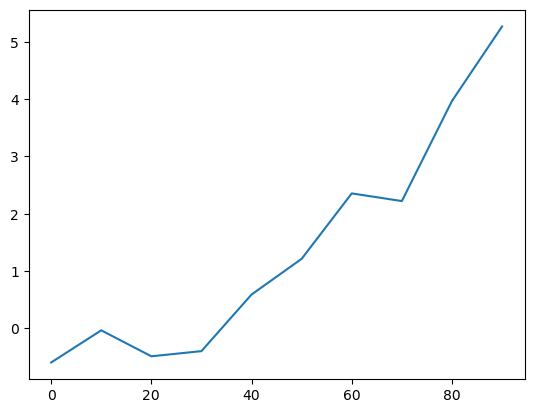

In [66]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0,100,10))
s.plot()

<Axes: >

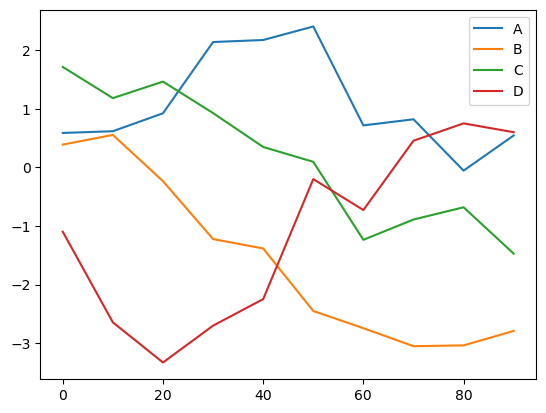

In [67]:
df = pd.DataFrame(np.random.randn(10,4).cumsum(0),
                 columns=['A', 'B', 'C', 'D'],
                 index=np.arange(0, 100, 10))
df.plot()

<Axes: >

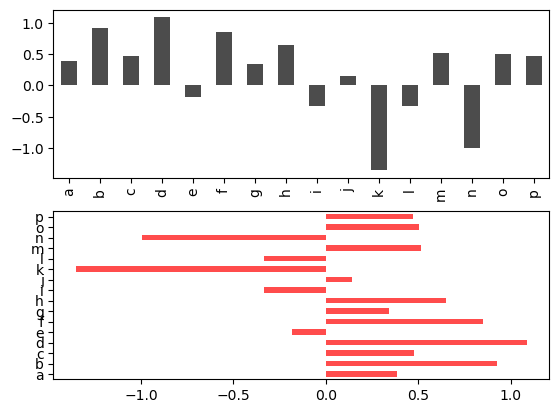

In [68]:
fig, axes = plt.subplots(2,1)
data = pd.Series(np.random.randn(16), index=list('abcdefghijklmnop'))
data
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='r', alpha=0.7)

In [69]:
df = pd.DataFrame(np.random.rand(6,4),
                 index = ['one', 'two', 'three', 'four', 'five', 'six'],
                 columns = pd.Index(['A','B','C','D'], name='Genus'))
df

Genus,A,B,C,D
one,0.556583,0.742709,0.707422,0.086036
two,0.271226,0.206961,0.471779,0.473717
three,0.989159,0.955627,0.580294,0.142626
four,0.411084,0.607439,0.316130,0.958398
five,0.666535,0.137387,0.672682,0.315723
six,0.485496,0.031687,0.476881,0.472905


<Axes: >

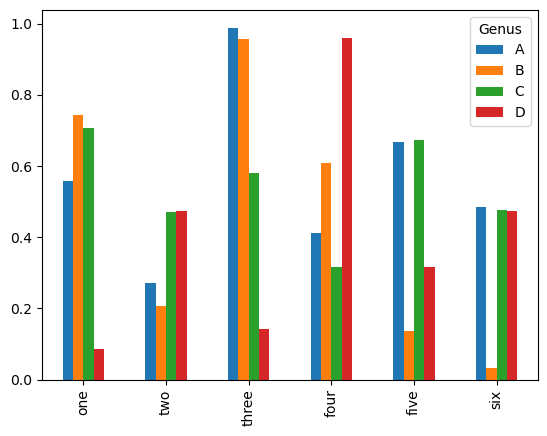

In [72]:
df.plot.bar()

<Axes: >

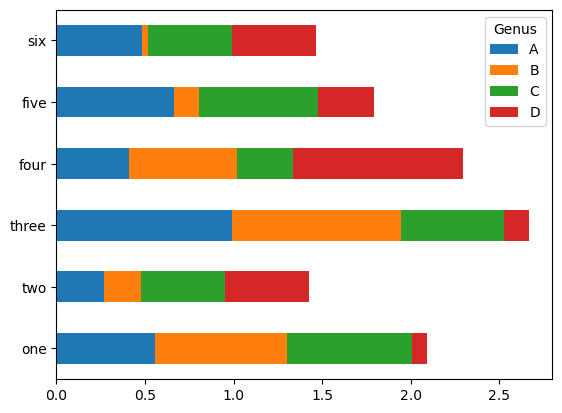

In [74]:
df.plot.barh(stacked=True, alpha=1.0)

In [76]:
tips = pd.read_csv('수업자료/tips.csv')
tips

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [79]:
import seaborn as sns
sns.set(style="whitegrid")

In [80]:
tips['tip_pct'].plot.hist(bins=50)

KeyError: 'tip_pct'

In [81]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


In [82]:
tmp = tips[tips['day']=='Sun']
tmp['tip_pct'].mean()

0.22571784420673371

<Axes: xlabel='tip_pct', ylabel='day'>

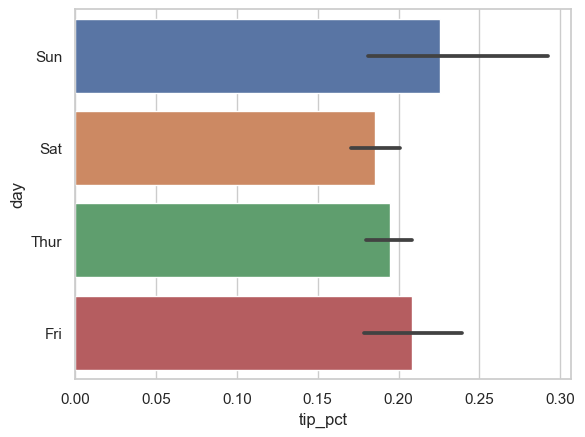

In [85]:
%matplotlib inline

import seaborn as sns
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')
#seaborn의 data인자는 pandas의 DataFrame을 받는다.
#day 컬럼의 각 값에 대한 데이터는 여러개 존재하므로 tip_pct의 평균값으로 막대그래프를 그린다.
#막대 그래프 위에 덧그려진 검은 선은 95%의 신뢰구간을 나타낸다.

<Axes: ylabel='Frequency'>

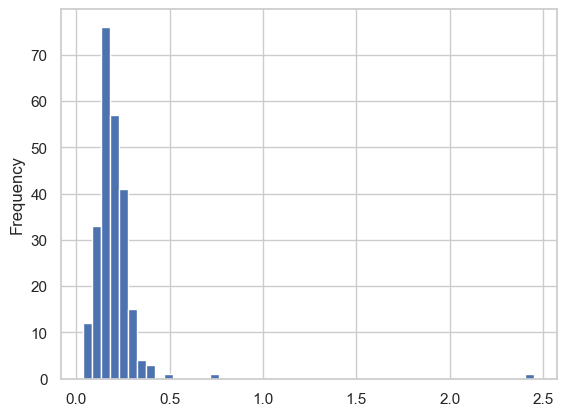

In [86]:
plt.close()
tips['tip_pct'].plot.hist(bins=50)

<Axes: ylabel='Density'>

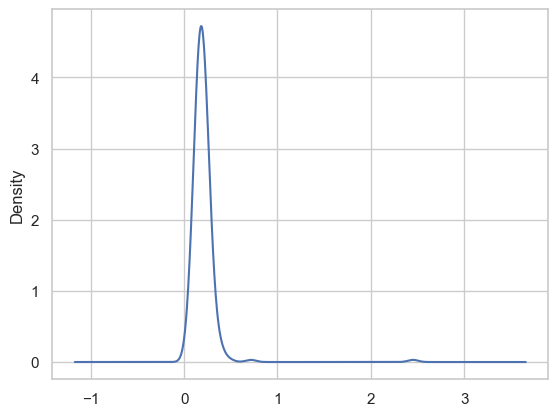

In [87]:
tips['tip_pct'].plot.density()

C:\Users\LG\AppData\Local\Temp\ipykernel_13128\1174075892.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(x, bins=50)


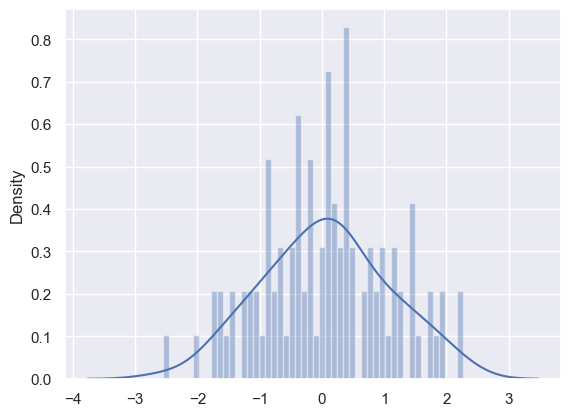

In [88]:
import seaborn as sns, numpy as np
sns.set(); np.random.seed(0)
x = np.random.randn(100)
ax=sns.distplot(x, bins=50)

C:\Users\LG\AppData\Local\Temp\ipykernel_13128\1005429470.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(values, bins=100, color='k')


<Axes: ylabel='Density'>

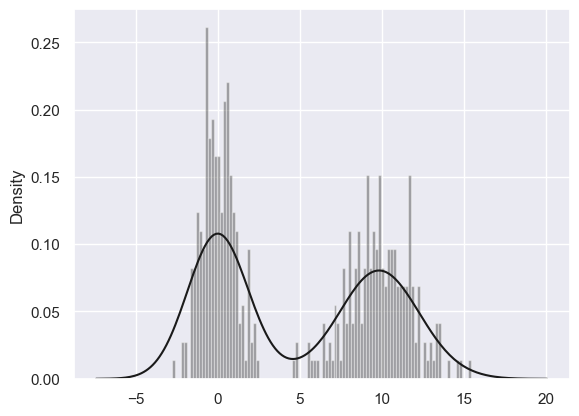

In [89]:
import pandas as pd
import seaborn as sns

comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins=100, color='k')

C:\Users\LG\AppData\Local\Temp\ipykernel_13128\1567470724.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(values, bins=100, color='k')


<Axes: ylabel='Density'>

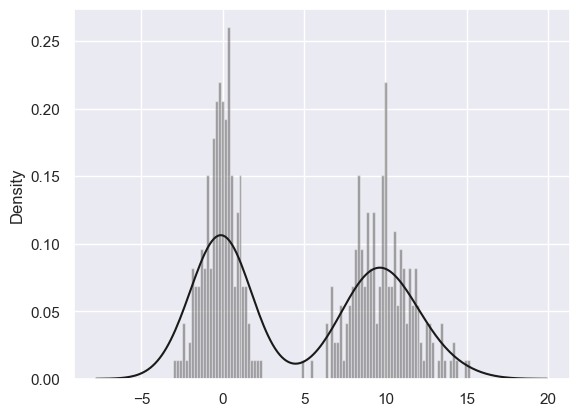

In [90]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins=100, color='k')

In [93]:
macro = pd.read_csv('examples/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


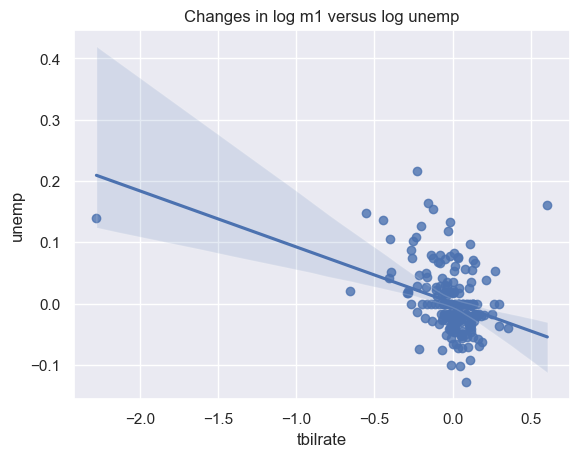

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

# trans_data는 사용자가 정의해야 합니다.
sns.regplot(x='tbilrate', y='unemp', data=trans_data)
plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))
plt.show()


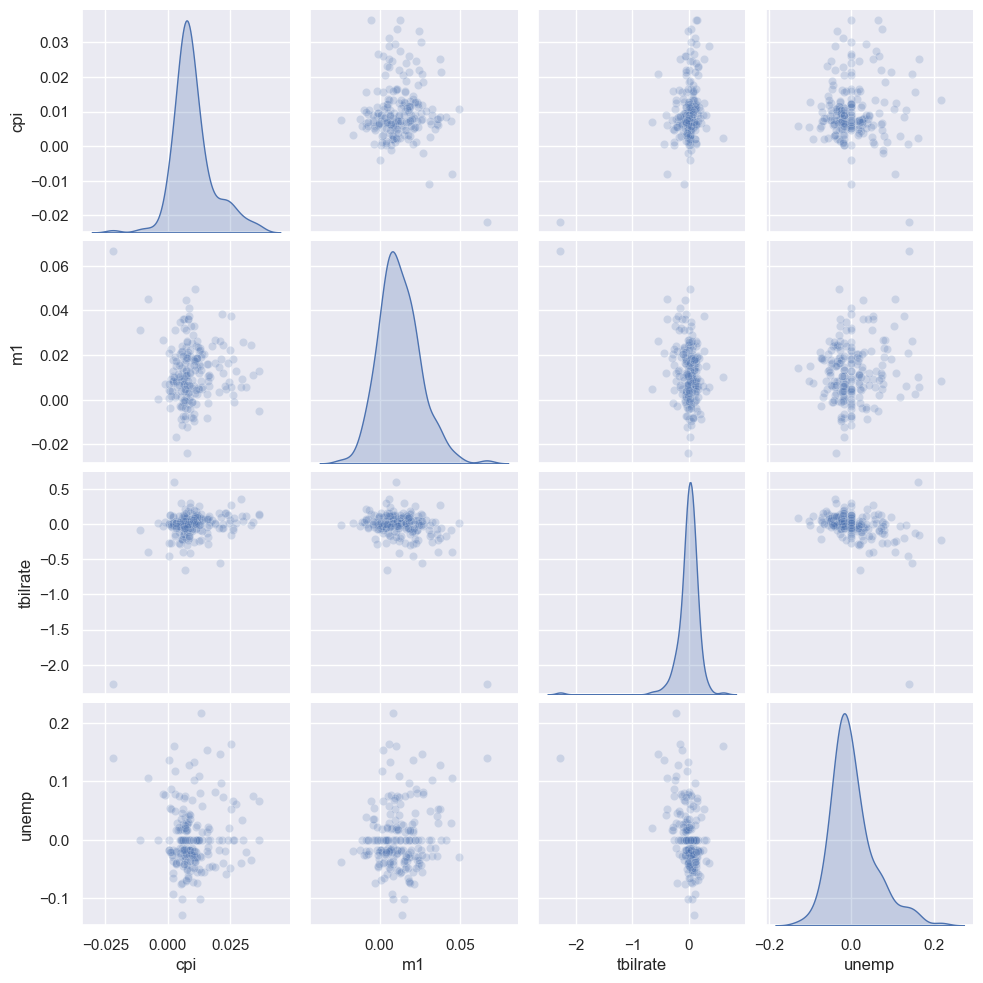

In [97]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})
#sns.pairplot() 함수는 데이터프레임의 각 열에 대한 산점도 행렬을 생성하여 변수 간의 관계를 시각화하는 데 사용됩니다. 주어진 데이터프레임 trans_data에 있는 모든 열의 쌍에 대한 산점도를 그리고, 대각선에는 각 변수의 분포를 나타내는 커널 밀도 추정(KDE) 그래프를 그립니다.

#여기서 diag_kind='kde'는 대각선에 커널 밀도 추정(KDE)을 표시하도록 지정하고, plot_kws={'alpha': 0.2}는 산점도의 투명도를 0.2로 설정합니다.

#이제 이 코드를 실행하면 데이터프레임의 모든 열에 대한 산점도 행렬이 생성되고, 대각선에는 KDE 그래프가 표시될 것입니다.